# Optimize 401(k)

This client's portfolio balance was $1.16M. They came to me to use a service I had developed called Optimize 401(k) - a 21-point review for retirement investments.

One feature of this service was reviewing the combined asset allocation, and the asset classes within each account.

This notebook is an example of Exploratory Data Analysis (EDA) of the existing investments, followed by constructing a new portfolio (if necessary). I've analyzed hundreds of portfolios. It's very rare to see one that couldn't use some type of improvement. When they don't, it's usually someone who had been listening to my talk show for years and already followed all of my advice.

Let's get to it...

### Why Use Python?
Every firm has their own proprietary re-balancers. Most of them are abysmal. And they tend to use the brokers own funds, which limits the options available. At the end of the day, most planners end up with their own Excel spreadsheets and a financial calculator. No client wants to (or should) look at Excel files. This notebook has cool charts that anyone can grasp.

In [7]:
# Standard python imports
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Client Data

This is a real dataset from a client, including the investments, allocation, and balances. There is no personally identifying information.

In [8]:
df = pd.read_excel('401k-client-data.xlsx')

# Display the dictionary
df.head()

,Account Type,Owner,Ticker,Asset Class,Desc,QTY,Balance,Portfolio
0,IRA,Husband,VIMAX,Stock,Vanguard Mid-Cap Index Fund Admiral,141,43336,Portfolio
1,IRA,Husband,VBTLX,Bond,Vanguard Total Bond Market Index Fund Admiral,6410,72762,Portfolio
2,IRA,Husband,VTABX,Bond,Vanguard Total International Bond Index Fund A...,3161,72628,Portfolio
3,IRA,Husband,VTIAX,Stock,Vanguard Total International Stock Index Fund ...,2244,80743,Portfolio
4,IRA,Husband,VTSAX,Stock,Vanguard Total Stock Market Index Fund Admiral,670,76137,Portfolio


In [9]:
# Print unique tickers
unique_tickers = df['Ticker'].unique()
print(unique_tickers)

['VIMAX' 'VBTLX' 'VTABX' 'VTIAX' 'VTSAX' 'BIL' 'VGHCX' 'VLCAX' 'VSGAX'
 'VGSLX' 'VSIAX' 'VTWAX']


All tickers are Vanguard funds. That's how I know this client has been following my advice.

In [10]:
# Chart the breakdown of the portfolio by asset class
import plotly.express as px

fig = px.sunburst(df,
                  path=["Portfolio", "Asset Class", "Ticker"],
                  values='Balance',
                  width=750, height=750,
                  title="Client Portfolio Composition by Asset Class and Fund",
                  )
fig.show()

This portfolio has a large cash position.

In [11]:
def get_cagr(ticker):
    # Fetch historical market data for the given ticker symbol
    stock = yf.Ticker(ticker)
    hist = stock.history(period="max")  # Fetch data for the maximum available period

    # Calculate the initial and final adjusted close prices
    initial_price = hist['Close'].iloc[0]
    final_price = hist['Close'].iloc[-1]

    # Calculate the number of years
    start_date = hist.index[0]
    end_date = hist.index[-1]
    num_years = (end_date - start_date).days / 365.25  # Approximate number of years

    # Calculate CAGR
    cagr = (final_price / initial_price) ** (1 / num_years) - 1

    return cagr

In [12]:
# Calculate lifetime returns for each ticker
lifetime_returns = {ticker: get_cagr(ticker) for ticker in unique_tickers}
lifetime_returns

{'VIMAX': 0.09656602521756241,
 'VBTLX': 0.02881038347692133,
 'VTABX': 0.021294482090999045,
 'VTIAX': 0.04997259710510238,
 'VTSAX': 0.08375785274845882,
 'BIL': 0.010371942885902152,
 'VGHCX': 0.15092025508115814,
 'VLCAX': 0.10341614001523558,
 'VSGAX': 0.11169851799708908,
 'VGSLX': 0.07874615525217421,
 'VSIAX': 0.11578435246089303,
 'VTWAX': 0.11727829220203256}

If you check the calculated CAGR against any fund's return since inception - they will match. Check VGHCX for example. With VGHCX you'll realize those 15% returns can only be had if you had invested 15+ years ago. That's a rookie mistake when investing - chasing returns because the fund was a rocket for the first couple years. But I digress...

VMFXX is 0%, because it's a money market fund (cash). They likely don't track the returns since the NAV is always $1.

# Current Asset Allocation

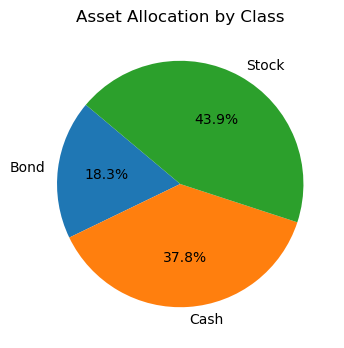

In [13]:
# Group by asset class
grouped = df.groupby('Asset Class')['Balance'].sum()

# Create a pie chart of the asset allocation
plt.figure(figsize=(4,4))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('Asset Allocation by Class')

# Display the pie chart
plt.show()

Without context, the pie chart is meaningless. What it does is provide a place to ask questions about goals and risk tolerance. Too much of any particular asset class isn't necessarily a bad thing. It depends completely on the customer's goals, and is tied to risk (which is often overlooked).

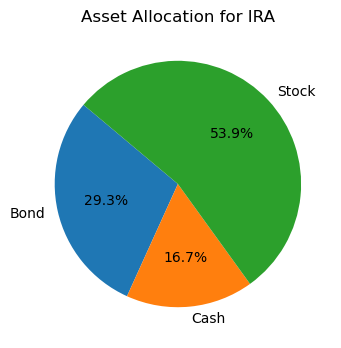

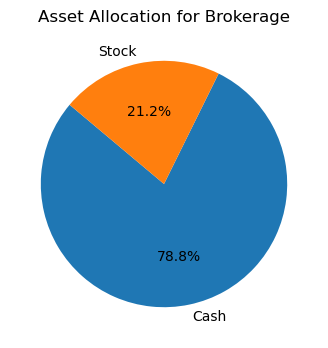

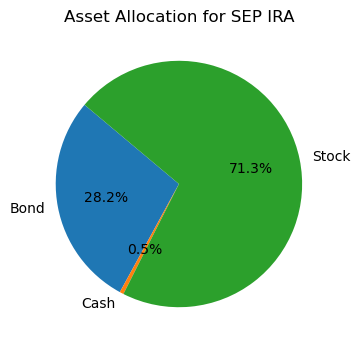

In [14]:
# For each account type display the asset allocation.
# Note this aggregates the asset allocation for all accounts of the same type. We don't
# care if there is two IRAs or ten IRAs. We just want to know the asset allocation for all IRAs.
for account_type in df['Account Type'].unique():
    # Filter the dataframe by account type
    subset = df[df['Account Type'] == account_type]

    # Group by asset class
    grouped = subset.groupby('Asset Class')['Balance'].sum()

    # Create a pie chart of the asset allocation
    plt.figure(figsize=(4,4))
    plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Asset Allocation for {account_type}')

    # Display the pie chart
    plt.show()

This asset allocation across accounts has lots of room for improvement. 

- The cash in the brokerage account (money market) could be earning more interest in something else.
- The percent of stocks in the SEP IRA vs. the IRA needs investigating. Without looking at the fund choices it's hard to understand why these are divided this way.
- There is uninvested cash in the SEP IRA
- There is a lot of uninvested cash in the IRA

# Recommended Asset Allocation

When considering how to put money to work to achieve goals, a holistic approach is used to consider the complete financial picture. Purely for this investment analysis, all investments are first grouped together. Then they are broken down into finer detail across account types.

Think of it as using food as fuel. Imagine an Olympic athlete who would want to consume so much protein, so much carbs, and so much fat each day. They would then divide that down into specific meals. 

Investing properly is exactly like that. We have so much money to invest. Then we pick what percent of stocks/bonds/cash. Then we figure out where those things are going to go (retirement accounts, self-managed accounts, bank accounts, etc.)

So we start with - what are the current investments? Often it's an ugly pie.

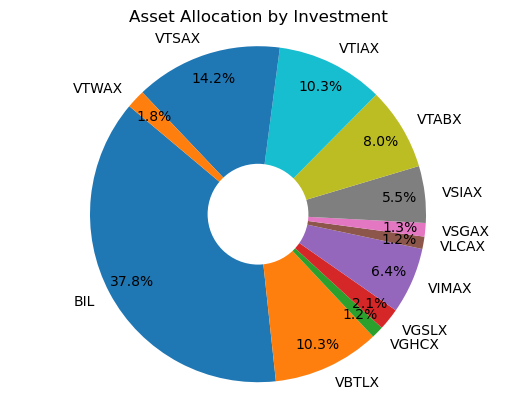

In [15]:
ugly_pi = df.groupby('Ticker')['Balance'].sum()
# Calculate the percentage of each investment type
type_percentages = ugly_pi / ugly_pi.sum() * 100

wedges, texts, autotexts = plt.pie(type_percentages, labels=type_percentages.index, autopct='%1.1f%%', startangle=140,
                                   pctdistance=0.85, labeldistance=1.1)

# Draw circle for better appearance
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Asset Allocation by Investment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


That's an ugly pie. It's complicated, hard to read, and probably has a lot of redundancy within the funds that people don't realize. It's quite normal for non-professionals to have something like this as their retirement plan. As an example one client portfolio had several mutual funds, and every single fund held Facebook stock across four different mutual funds. All totaled the client had 6% of his portfolio invested in Facebook, without even knowing it.

# Sell, Buy, and Rebalance

For this client a 60/40 asset allocation between stocks and bonds was appropriate for their age and risk tolerance. We'll use Vanguard funds because they have the lowest expense ratios. All of these funds were available to the client because they managed all of their own accounts.

What happens if you have a 401(k)? Usually a 401(k) will have 10-15 investment choices. The process would take a little longer, but the steps remain the same. A spreadsheet with the best investments available could be input into process. The individual fund percentages and number of investments would change. The asset allocation would not.

Think of it like grocery shopping. If the store is out of something - you find a substitute. If the store doesn't have a can of diced tomatoes, you pick a can of whole tomatoes (and cut them yourself). The recipe doesn't change - just the ingredients.

In [16]:
# Read in the recommended fund choices and their percent allocation for a 60/40 portfolio
df_new_portfolio = pd.read_excel('60-40-Vanguard-Portfolio.xlsx')
df_new_portfolio.head(15)

,Desc,Ticker,Asset Class,Percent
0,Vanguard Total Stock Market ETF,VTI,Stock,19.8
1,Vanguard FTSE Developed Markets ETF,VEA,Stock,16.7
2,Vanguard FTSE Emerging Markets ETF,VWO,Stock,10.3
3,Vanguard Value ETF,VTV,Stock,5.3
4,Vanguard Mid-Cap Value ETF,VOE,Stock,4.3
5,Vanguard Small-Cap Value ETF,VBR,Stock,3.6
6,Vanguard Total Bond Market Index Adm,VBTLX,Bond,12.3
7,Vanguard Total International Bond ETF,BNDX,Bond,14.7
8,Vanguard Emerging Markets Bond Admiral,VEGBX,Bond,8.0
9,Vanguard Short-Term Infl-Prot Secs ETF,VTIP,Bond,5.0


Where did these fund choices and percentages come from? The choices are based on Nobel Prize winning research and the efficient market hypothesis. You might be wondering - 'yes, but exactly where?' Investment advisors that think they have some type of secret sauce suffer from 'overconfidence bias'. This bias is one of many in behavior finance (from more Nobel Prize winning research). What I do is look at the top firms and see how they divide stuff up (based on age and risk-tolerance). Then I do the exact same thing. There's no point in reinventing the wheel.

**WARNING** To keep this process shorter, I'm skipping over the exclusion of the stocks in the Brokerage account from the calculations. Why? Because if we sell these it's a tax hit. It gets complex to follow along, but the basic idea that professionals do is:

- Calculate the total sum of the portfolio
- Divide the dollar amounts up into the new portfolio, by the new percents for each fund (see the previous list)
- For each fund that isn't being sold, figure out it's asset class, and category. For example: Large-cap domestic stocks, small-cap domestic stocks, government bonds. If any of that is confusing, check out my best-selling book [99 Minute Millionaire](https://www.amazon.com/99-Minute-Millionaire-Simplest-Investing-ebook/dp/B01K9ISOH8)

In [17]:
# Treat the brokerage accounts as untoucbable
df_retirement_accts = df[df['Account Type'] != 'Brokerage']
df_retirement_accts.head()

,Account Type,Owner,Ticker,Asset Class,Desc,QTY,Balance,Portfolio
0,IRA,Husband,VIMAX,Stock,Vanguard Mid-Cap Index Fund Admiral,141,43336,Portfolio
1,IRA,Husband,VBTLX,Bond,Vanguard Total Bond Market Index Fund Admiral,6410,72762,Portfolio
2,IRA,Husband,VTABX,Bond,Vanguard Total International Bond Index Fund A...,3161,72628,Portfolio
3,IRA,Husband,VTIAX,Stock,Vanguard Total International Stock Index Fund ...,2244,80743,Portfolio
4,IRA,Husband,VTSAX,Stock,Vanguard Total Stock Market Index Fund Admiral,670,76137,Portfolio


In [18]:
# Except for any cash we have in the brokerage accounts, that's getting reallocated.
df_brokerage_cash = df[(df['Account Type'] == 'Brokerage') & (df['Asset Class'] == 'Cash')]
df_brokerage_cash.head()

,Account Type,Owner,Ticker,Asset Class,Desc,QTY,Balance,Portfolio
10,Brokerage,Wife,BIL,Cash,Vanguard Federal Money Market Fund,11913,11913,Portfolio
24,Brokerage,Joint,BIL,Cash,Vanguard Federal Money Market Fund,328818,328818,Portfolio


In [19]:
# Add up what will be rebalanced
sum_reallocation_balance = df_retirement_accts['Balance'].sum() + df_brokerage_cash['Balance'].sum()
print(f'Total amount for reallocation: ${sum_reallocation_balance:,.0f}')

Total amount for reallocation: $1,070,451


In [20]:
# Roll up the existing portfolio by ticker, to determine the percent of each fund
df_current_funds = pd.concat([df_retirement_accts, df_brokerage_cash])
df_current_allocation = df_current_funds.groupby('Ticker')['Balance'].sum().reset_index()
df_current_allocation['Percent'] = (df_current_allocation['Balance'] / df_current_allocation['Balance'].sum()) * 100
df_current_allocation

,Ticker,Balance,Percent
0,BIL,439403,41.048399
1,VBTLX,119859,11.197056
2,VGSLX,24596,2.297723
3,VIMAX,74075,6.919980
4,VSIAX,63498,5.931892
5,VTABX,92483,8.639629
6,VTIAX,120105,11.220037
7,VTSAX,115457,10.785828
8,VTWAX,20975,1.959454


Add the benchmarks for each fund. We'll need these later for visualizations.

In [21]:
# Benchmark indices for each fund in the current portfolio
benchmark_indices = {
    'VBTLX': 'BND',   # Vanguard Total Bond Market ETF
    'VGSLX': 'VNQ',   # Vanguard Real Estate ETF
    'VIMAX': 'VTI',   # Vanguard Total Stock Market ETF
    'BIL': 'BIL', # Vanguard Money Market Fund (self as benchmark)
    'VSIAX': 'IWN',   # iShares Russell 2000 Value ETF
    'VTABX': 'BNDX',  # Vanguard Total International Bond Index ETF
    'VTIAX': 'VEU',   # Vanguard FTSE All-World ex-US ETF
    'VTSAX': 'VTI',   # Vanguard Total Stock Market ETF
    'VTWAX': 'VT'     # Vanguard Total World Stock ETF
}

In [22]:
# Add a new column for the benchmark index
df_current_allocation['Benchmark'] = df_current_allocation['Ticker'].map(benchmark_indices)
df_current_allocation

,Ticker,Balance,Percent,Benchmark
0,BIL,439403,41.048399,BIL
1,VBTLX,119859,11.197056,BND
2,VGSLX,24596,2.297723,VNQ
3,VIMAX,74075,6.919980,VTI
4,VSIAX,63498,5.931892,IWN
5,VTABX,92483,8.639629,BNDX
6,VTIAX,120105,11.220037,VEU
7,VTSAX,115457,10.785828,VTI
8,VTWAX,20975,1.959454,VT


In [23]:
df_grp_brokerage = df_brokerage_cash.groupby(['Account Type', 'Owner'])['Balance'].sum()
df_grp_retirement = df_retirement_accts.groupby(['Account Type', 'Owner'])['Balance'].sum()
df_grp_all = pd.concat([df_grp_brokerage, df_grp_retirement], axis=0).reset_index()
df_grp_all

,Account Type,Owner,Balance
0,Brokerage,Joint,328818
1,Brokerage,Wife,11913
2,IRA,Husband,414518
3,IRA,Wife,170696
4,SEP IRA,Wife,144506


In [24]:
# Based on the percents for each asset class, calculate the amount to buy for each asset class
df_new_portfolio['amt_to_buy'] = round((df_new_portfolio['Percent']/100) * sum_reallocation_balance)
df_new_portfolio.head(15)

,Desc,Ticker,Asset Class,Percent,amt_to_buy
0,Vanguard Total Stock Market ETF,VTI,Stock,19.8,211949.0
1,Vanguard FTSE Developed Markets ETF,VEA,Stock,16.7,178765.0
2,Vanguard FTSE Emerging Markets ETF,VWO,Stock,10.3,110256.0
3,Vanguard Value ETF,VTV,Stock,5.3,56734.0
4,Vanguard Mid-Cap Value ETF,VOE,Stock,4.3,46029.0
5,Vanguard Small-Cap Value ETF,VBR,Stock,3.6,38536.0
6,Vanguard Total Bond Market Index Adm,VBTLX,Bond,12.3,131665.0
7,Vanguard Total International Bond ETF,BNDX,Bond,14.7,157356.0
8,Vanguard Emerging Markets Bond Admiral,VEGBX,Bond,8.0,85636.0
9,Vanguard Short-Term Infl-Prot Secs ETF,VTIP,Bond,5.0,53523.0


In [25]:
# Benchmark indices for each fund in the new portfolio
benchmark_indices = {
    'VTI': 'SPY',   # S&P 500 ETF
    'VEA': 'VEU',   # Vanguard FTSE All-World ex-US ETF
    'VWO': 'EEM',   # iShares MSCI Emerging Markets ETF
    'VTV': 'VOO',   # Vanguard S&P 500 ETF
    'VOE': 'VO',    # Vanguard Mid-Cap ETF
    'VBR': 'IWN',   # iShares Russell 2000 Value ETF
    'VBTLX': 'BND', # Vanguard Total Bond Market ETF
    'BNDX': 'AGG',  # iShares Core U.S. Aggregate Bond ETF
    'VEGBX': 'IUSB',# iShares Core Total USD Bond Market ETF
    'VTIP': 'SCHP'  # Schwab U.S. TIPS ETF
}

In [26]:
# Add a new column for the benchmark index
df_new_portfolio['Benchmark'] = df_new_portfolio['Ticker'].map(benchmark_indices)
df_new_portfolio

,Desc,Ticker,Asset Class,Percent,amt_to_buy,Benchmark
0,Vanguard Total Stock Market ETF,VTI,Stock,19.8,211949.0,SPY
1,Vanguard FTSE Developed Markets ETF,VEA,Stock,16.7,178765.0,VEU
2,Vanguard FTSE Emerging Markets ETF,VWO,Stock,10.3,110256.0,EEM
3,Vanguard Value ETF,VTV,Stock,5.3,56734.0,VOO
4,Vanguard Mid-Cap Value ETF,VOE,Stock,4.3,46029.0,VO
5,Vanguard Small-Cap Value ETF,VBR,Stock,3.6,38536.0,IWN
6,Vanguard Total Bond Market Index Adm,VBTLX,Bond,12.3,131665.0,BND
7,Vanguard Total International Bond ETF,BNDX,Bond,14.7,157356.0,AGG
8,Vanguard Emerging Markets Bond Admiral,VEGBX,Bond,8.0,85636.0,IUSB
9,Vanguard Short-Term Infl-Prot Secs ETF,VTIP,Bond,5.0,53523.0,SCHP


Now we know how much to buy of each fund. The final step is to figure out the allocation accross all of the invesment account types, given their buying power.

In [27]:
# These amounts should match
print(f'Total amount split up: ${df_new_portfolio['amt_to_buy'].sum():,.0f}')

Total amount split up: $1,070,449


In [28]:
# Recompute these percentages, because we triple check everything
print(f'Total bond percent: {round(df_new_portfolio[df_new_portfolio['Asset Class'] == 'Bond']['Percent'].sum())}')
print(f'Total stock percent: {round(df_new_portfolio[df_new_portfolio['Asset Class'] == 'Stock']['Percent'].sum(), 0)}')

Total bond percent: 40
Total stock percent: 60.0


In [29]:
#
def reallocate(new_portfolio: pd.DataFrame, current_accounts: pd.DataFrame) -> pd.DataFrame: 
    '''401k-client-data.xlsx is the original data file. It is read in and the brokerage accounts are
    separated out. The brokerage accounts are not touched except for any cash in them. The cash is
    reallocated. The remaining accounts are rebalanced based on the 60-40 portfolio. The new balances
    are written to std out.
    Priorities:
    1. Cash in brokerage accounts is used to purchase stocks (not bonds).
    2. There is no need to divide every account up to have every investment in the 60/40 percentages. Fill
    up one bucket, then move on to the next.
    '''
    # make a copy to preserve the original
    trades = pd.DataFrame(columns=['Account Type', 'Owner', 'Ticker', 'Amount'])  # Define columns for clarity

    # We're altering the balances during the process, so work on a copy  
    accounts = current_accounts.copy()
    # These are the fund to buy and the amount to buy
    for index, fund in new_portfolio.iterrows():
        # Each fund has a fund balance to buy. We might be able to get it all in one account, 
        # or have to split it over accounts.
        fund_balance = fund['amt_to_buy']
        # Loop over each account type
        acct_balance = 0
        for index, acct in accounts.iterrows():

            # Each account has a balance to make trades from
            acct_balance = accounts.at[index, 'Balance']

            # If the account balance reaches zero, we move on to the next account
            if (acct_balance > 0):

                # If the account has more money than we need, we buy all we need of this fund
                if acct_balance >= fund_balance:
                    amt_to_buy = fund_balance
                    # Create a new trade to make from the current account and fund
                    new_trade = pd.DataFrame({'Account Type': [acct['Account Type']], 'Owner': [acct['Owner']], 
                                            'Ticker': [fund['Ticker']], 'Amount': [amt_to_buy]})
                    trades = pd.concat([trades, new_trade], ignore_index=True)
                    # Update the account balance by subtracting the amount we just bought.
                    # This becomes the 'leftover' to be used for the next fund.
                    accounts.at[index, 'Balance'] = acct_balance - fund_balance
                    # This fund has no more cash buying power. Break out of the account loop to move
                    # on to the next fund.
                    break
                # else the account has less money, and the fund will need to be split over multiple accounts
                else:
                    # Create a new trade for the current fund in this account. Buy the remaining balance left
                    # in the account.
                    amt_to_buy = acct_balance
                    new_trade = pd.DataFrame({'Account Type': [acct['Account Type']], 'Owner': [acct['Owner']], 
                                            'Ticker': [fund['Ticker']], 'Amount': [amt_to_buy]})
                    trades = pd.concat([trades, new_trade], ignore_index=True)
                    
                    # This account now has no more buying power. The account will be skipped the remaining
                    # iterations because it's balance is zero.
                    accounts.at[index, 'Balance'] = 0
                    # Reduce the fund balance. The fund balance will be split over into the next account loop
                    fund_balance -= acct_balance
                    #acct_balance = 0
    
    return trades
        

                   
            

In [30]:
# Reallocate and print the results
trades = reallocate(df_new_portfolio, df_grp_all)
trades

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_34552/3298889839.py:38: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Account Type,Owner,Ticker,Amount
0,Brokerage,Joint,VTI,211949.0
1,Brokerage,Joint,VEA,116869.0
2,Brokerage,Wife,VEA,11913.0
3,IRA,Husband,VEA,49983.0
4,IRA,Husband,VWO,110256.0
5,IRA,Husband,VTV,56734.0
6,IRA,Husband,VOE,46029.0
7,IRA,Husband,VBR,38536.0
8,IRA,Husband,VBTLX,112980.0
9,IRA,Wife,VBTLX,18685.0


In [31]:
# Verify the total amount to buy matches what we calculated earlier
print(f'Amount to buy: ${trades['Amount'].sum():,.0f}')

Amount to buy: $1,070,449


We now have a list of trades to make, for each account.

**Note** Bonds are in the input file last. Which means they will get allocated last. If the input account list had the brokerage accounts listed last, the bonds would go into this account. That's probably not what you want, since bonds will kick off income and this would create a yearly tax hit. The code could have been modified to build additional rules. There is no shortage of rules that could be coded. In the end everything has to be verified by human eyes, otherwise it's a violation of due-diligence. You don't want investing mistakes to happen by blindly trusting software (like this). Trust but Verify.

# Performance

Many people want to see how well the new portfolio compares to the old one. You can't tell a client it doesn't matter (it doesn't). Sometimes the new portfolio will perform better than the old one when backtested, and sometimes it won't. Again - it doesn't matter. A 100% stock portfolio will outperform a 60/40 over any 15-year period. 

What matters most is - are the goals met? Are the risk-adjusted returns appropriate for the goals? Returns tell half the story.

In [32]:
df_new_portfolio.head(15)

,Desc,Ticker,Asset Class,Percent,amt_to_buy,Benchmark
0,Vanguard Total Stock Market ETF,VTI,Stock,19.8,211949.0,SPY
1,Vanguard FTSE Developed Markets ETF,VEA,Stock,16.7,178765.0,VEU
2,Vanguard FTSE Emerging Markets ETF,VWO,Stock,10.3,110256.0,EEM
3,Vanguard Value ETF,VTV,Stock,5.3,56734.0,VOO
4,Vanguard Mid-Cap Value ETF,VOE,Stock,4.3,46029.0,VO
5,Vanguard Small-Cap Value ETF,VBR,Stock,3.6,38536.0,IWN
6,Vanguard Total Bond Market Index Adm,VBTLX,Bond,12.3,131665.0,BND
7,Vanguard Total International Bond ETF,BNDX,Bond,14.7,157356.0,AGG
8,Vanguard Emerging Markets Bond Admiral,VEGBX,Bond,8.0,85636.0,IUSB
9,Vanguard Short-Term Infl-Prot Secs ETF,VTIP,Bond,5.0,53523.0,SCHP


In [33]:
df_current_allocation.head(15)

,Ticker,Balance,Percent,Benchmark
0,BIL,439403,41.048399,BIL
1,VBTLX,119859,11.197056,BND
2,VGSLX,24596,2.297723,VNQ
3,VIMAX,74075,6.919980,VTI
4,VSIAX,63498,5.931892,IWN
5,VTABX,92483,8.639629,BNDX
6,VTIAX,120105,11.220037,VEU
7,VTSAX,115457,10.785828,VTI
8,VTWAX,20975,1.959454,VT


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[*********************100%%**********************]  20 of 20 completed
[******                12%%                      ]  2 of 16 completed

The value of the portfolio after 10 years is: $24073.14
The final cumulative return after 10 years is: 140.73%


[*********************100%%**********************]  16 of 16 completed

The value of the portfolio after 10 years is: $18952.14
The final cumulative return after 10 years is: 89.52%


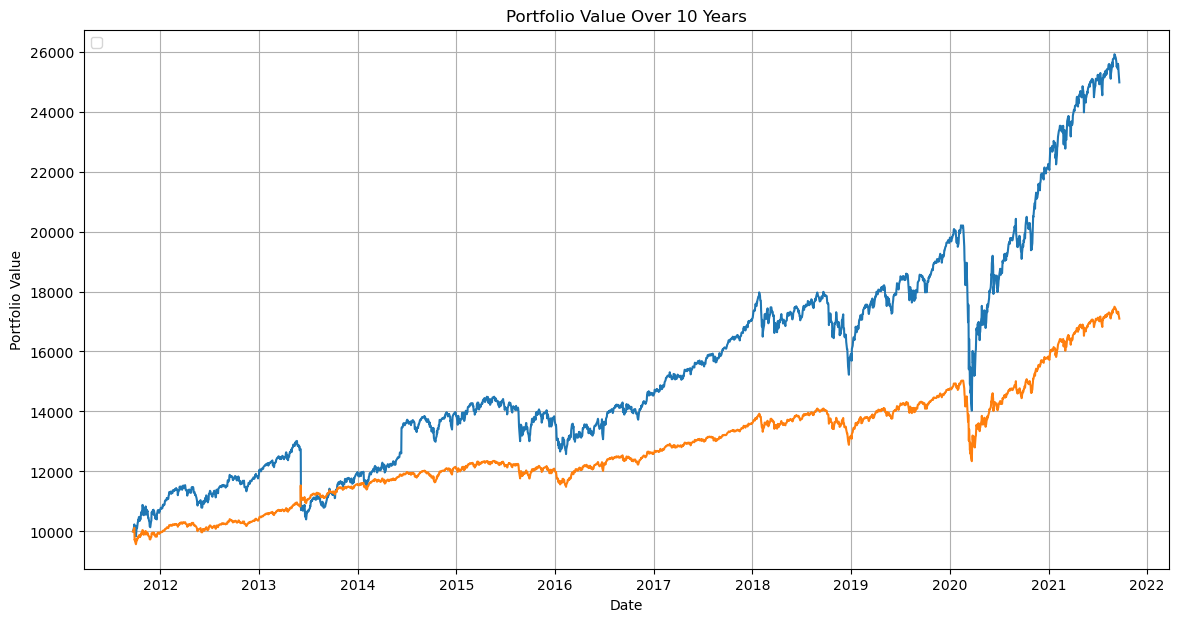

In [34]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

portfolios = [df_new_portfolio, df_current_allocation]     

# Visualization
plt.figure(figsize=(14, 7))
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over 10 Years')
plt.legend(loc='upper left')
plt.grid(True)

for row in portfolios:
 
    portfolio = {key: value for key, value in zip(row['Ticker'], row['Percent'])}
    benchmark_indices = {key: value for key, value in zip(row['Ticker'], row['Benchmark'])}
    # Convert percentages to proportions
    portfolio_proportions = {ticker: percent / 100 for ticker, percent in portfolio.items()}

    # Data Collection
    tickers = list(portfolio.keys()) + list(benchmark_indices.values())

    def download_data(tickers, start, end):
        data = yf.download(tickers, start=start, end=end)['Adj Close']
        return data

    # Download data for both the funds and their benchmarks
    data = download_data(tickers, '2011-09-22', '2021-09-21')

    # Separate fund and benchmark data
    fund_data = data[list(portfolio.keys())]
    benchmark_data = data[list(benchmark_indices.values())]

    # Backfill fund data with benchmark index data
    for fund, benchmark in benchmark_indices.items():
        if fund not in fund_data.columns:
            continue
        # Find the inception date of the fund
        inception_date = fund_data[fund].first_valid_index()
        if inception_date > fund_data.index[0]:
            # Backfill with benchmark data
            backfill_data = benchmark_data[benchmark].loc[:inception_date]
            fund_data.loc[:inception_date, fund] = backfill_data

    # Calculating cumulative returns using the correct formula
    original_price = fund_data.iloc[0]
    current_price = fund_data.iloc[-1]
    cumulative_returns = (current_price - original_price) / original_price

    # Initial investment
    initial_investment = 10000

    # Calculating weighted cumulative returns
    weighted_cumulative_returns = cumulative_returns * pd.Series(portfolio_proportions)
    total_cumulative_return = weighted_cumulative_returns.sum()

    # Final value of the portfolio
    final_value = initial_investment * (1 + total_cumulative_return)

    # Print final value and final cumulative returns
    print(f"The value of the portfolio after 10 years is: ${final_value:.2f}")
    print(f"The final cumulative return after 10 years is: {total_cumulative_return * 100:.2f}%")

    # Calculating portfolio value over time for visualization
    weighted_data = fund_data * pd.Series(portfolio_proportions)
    portfolio_value = initial_investment * (weighted_data.sum(axis=1) / weighted_data.sum(axis=1).iloc[0])

    plt.plot(portfolio_value.index, portfolio_value, label='Portfolio')



# Show the plot
plt.show()


I would argue part of having a fiduciary duty to a client is explaining the true meaning behind the chart above. Some people might take credit for being an amazing portfolio builder (like me! HA-HA) that allows them to get such high returns. The reality is the client portfolio had so much cash that wasn't generating returns, ANY portfolio that didn't have such a large cash portion would have done better. Throwing darts at a board to pick funds at random would have done better than the client portfolio (I have tested this out and proved it).

What the chart does illustrate is having a lot of money in cash is going to generate lower returns.

# Conclusion

Every brokerage has software that can do this at a push of a button (or two). It's important to understand what's going on. Financial planning will always require personalization. There are simply too many variables (and emotion!) involved in making a plan. Whether someone is using Kwanti, Portfolio Visualizer, BlackRock's UI, a scientific calculator, Python, or R, the results all have to be verified to uphold a fiduciary duty.

Some people want to DIY, but I doubt they would have been able to recognize a portfolio that had Facebook in four different funds.

1. Determine the goals
2. Determine the risk
3. Work backwards to figure out what to buy/sell/leave alone.
